In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# DATA PREPARATION

df= pd.read_csv('C:\/Users\Acer\Desktop\ML\DATA\delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df1= df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)
df1
df_sorted= df1.sort_values(by='Sorting_Time')
df_sorted

,Delivery_Time,Sorting_Time
18,8.00,2
7,9.50,3
13,11.50,3
14,12.03,3
1,13.50,4
15,14.88,4
11,10.75,4
20,21.50,5
2,19.75,6
5,15.35,6


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df1.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
df1.isna().sum()

#(there are no null values)

Delivery_Time    0
Sorting_Time     0
dtype: int64

C:\Users\Acer\AppData\Local\Temp\ipykernel_12328\2162949228.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


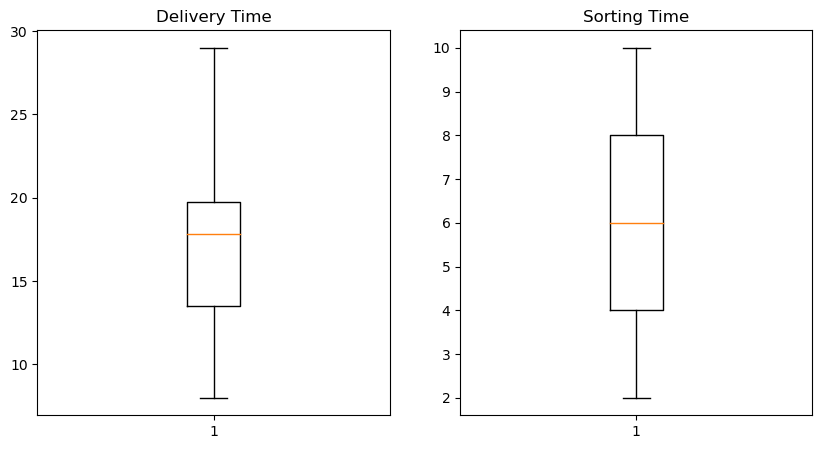

In [7]:
plt.subplots(figsize=(10,5))
plt.subplot(121)
plt.boxplot(df_sorted['Delivery_Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df_sorted['Sorting_Time'])
plt.title('Sorting Time')
plt.show()

#(there are no outliers)

C:\Users\Acer\AppData\Local\Temp\ipykernel_12328\4081578014.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(0, 0.5, 'Delivery_Time')

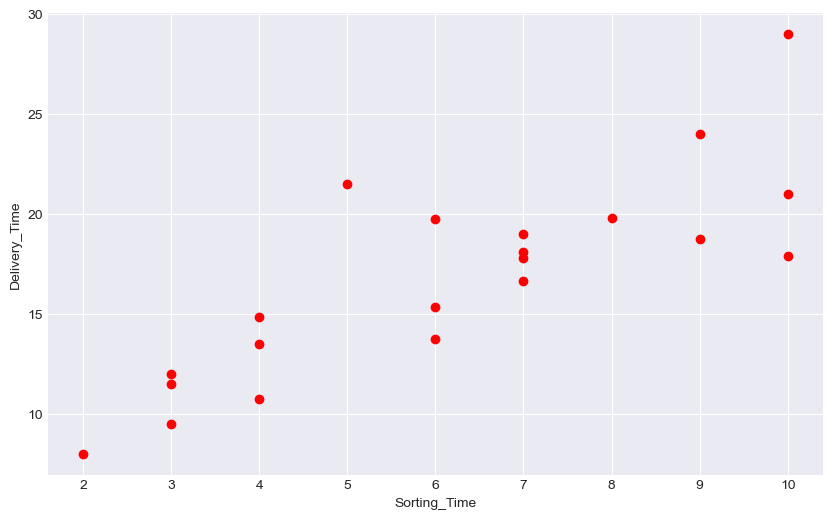

In [8]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,6))
plt.scatter(df_sorted['Sorting_Time'],df_sorted['Delivery_Time'],color='red')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

#(both the variables are positively correlated)
#(and looks like homosceadacity by visualization)

In [9]:
df1.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [10]:
# MODLING

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.formula.api as sfa

In [11]:
model1= sfa.ols('Delivery_Time~Sorting_Time', data=df_sorted).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           3.98e-06
Time:                        09:38:23   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   2.322
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model2=sfa.ols('Delivery_Time~np.log(Sorting_Time)', data=df_sorted).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           2.64e-06
Time:                        09:38:23   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   2.439
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model3= sfa.ols('Delivery_Time~Sorting_Time+pow(Sorting_Time,2)+np.log(Sorting_Time)', data=df_sorted).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     13.28
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           0.000103
Time:                        09:38:23   Log-Likelihood:                -50.724
No. Observations:                  21   AIC:                             109.4
Df Residuals:                      17   BIC:                             113.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.3719      4.584      0.517      0.612      -7.299      12.043
Sorting_Time            -3.2046      9.379     -0.342      0.737     -22.993      16.583
pow(Sorting_Time, 2)     0.1638      0.412      0.397      0.696      -0.706       1.034
np.log(Sorting_Time)    15.6046     24.015      0.650      0.525     -35.062      66.271
==============================================================================
Omnibus:                        3.609   Durbin-Watson:                   2.513
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.074
Skew:                           0.750   Prob(JB):                        0.354
Kurtosis:                       3.347   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model4= sfa.ols('Delivery_Time~np.sqrt(Sorting_Time)',data=df_sorted).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           2.61e-06
Time:                        09:41:52   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sorting_Time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   2.417
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model5= sfa.ols('Delivery_Time~np.cbrt(Sorting_Time)',data=df_sorted).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     43.79
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           2.48e-06
Time:                        09:41:42   Log-Likelihood:                -50.844
No. Observations:                  21   AIC:                             105.7
Df Residuals:                      19   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -11.5792      4.332     -2.673      0.015     -20.647      -2.511
np.cbrt(Sorting_Time)    15.7673      2.383      6.618      0.000      10.780      20.754
==============================================================================
Omnibus:                        4.963   Durbin-Watson:                   2.434
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.050
Skew:                           0.896   Prob(JB):                        0.218
Kurtosis:                       3.525   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Acer\AppData\Local\Temp\ipykernel_12328\2101106245.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(0, 0.5, 'Delivery Time')

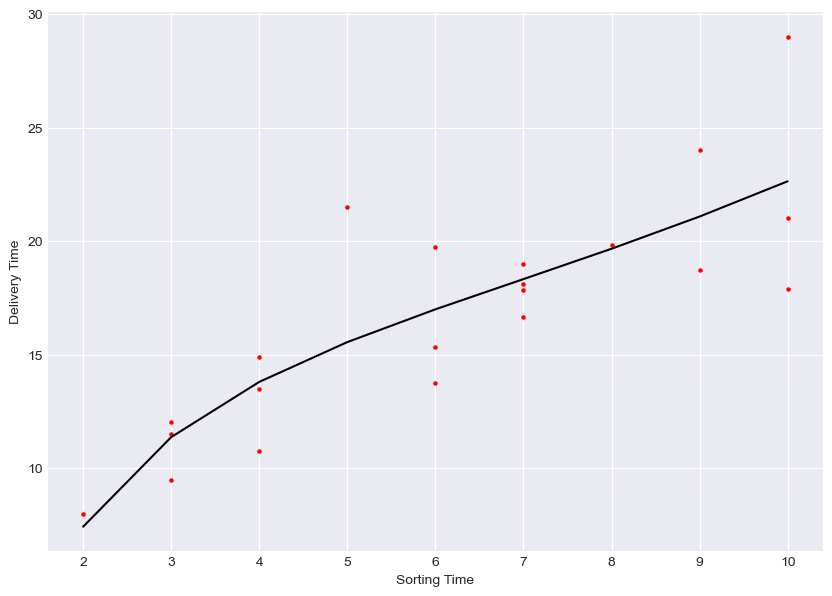

In [14]:
plt.figure(figsize=(10, 7))
plt.style.use('seaborn-darkgrid')
plt.scatter(df_sorted['Sorting_Time'], df_sorted['Delivery_Time'], color='red',s=5)
plt.plot(df_sorted['Sorting_Time'], model3.predict(), color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [15]:
predicted=pd.DataFrame()
predicted['Sorting_Time']=df_sorted['Sorting_Time']
predicted['Delivery_Time']=df_sorted['Delivery_Time']
predicted['Predicted_Delivery_Time']=model3.predict()
predicted

#(predicted delivery times)

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
18,2,8.00,7.434203
7,3,9.50,11.375724
13,3,11.50,11.375724
14,3,12.03,11.375724
1,4,13.50,13.806861
15,4,14.88,13.806861
11,4,10.75,13.806861
20,5,21.50,15.558474
2,6,19.75,17.000652
5,6,15.35,17.000652


In [16]:
act=[df_sorted['Delivery_Time']]
pre=[predicted['Predicted_Delivery_Time']]
error= [x-y for x, y in zip(act, pre)]
error

[18    0.565797
 7    -1.875724
 13    0.124276
 14    0.654276
 1    -0.306861
 15    1.073139
 11   -3.056861
 20    5.941526
 2     2.749348
 5    -1.650652
 16   -3.250652
 17   -0.220810
 6     0.669190
 19   -0.500810
 12   -1.650810
 10    0.163212
 3     2.915404
 9    -2.334596
 8    -4.736131
 4     6.363869
 0    -1.636131
 dtype: float64]

Text(0, 0.5, 'error')

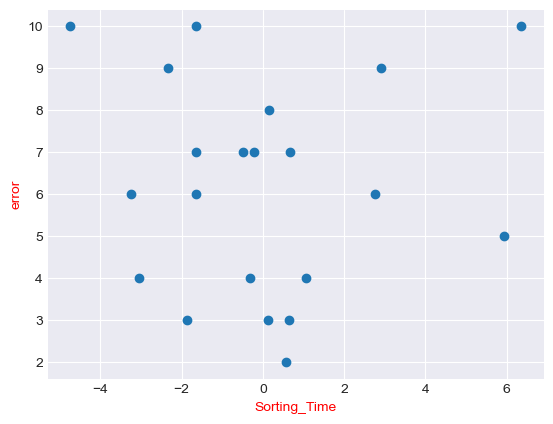

In [17]:
plt.scatter(error,df_sorted['Sorting_Time'])
plt.xlabel('Sorting_Time',c='r')
plt.ylabel('error',c='r')

#(here we can see that there is no correlaltion between the error and the variable )